In [41]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import risk_kit as erk
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

## GBM Interactive Plots

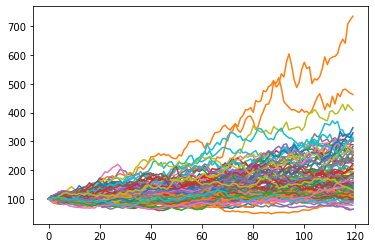

In [4]:
erk.gbm(10,100).plot(legend=False)

In [5]:
def show_gbm(n_scenarios, mu, sigma):
    """
    n_scenarios = int
    mu = %
    sigma = %
    Draw the results of stock price evolution under a Geometric Brownian Motion Model
    """
    s_0 = 100
    prices = erk.gbm(n_scenarios = n_scenarios, mu = mu, sigma = sigma, s_0 = s_0)
    ax = prices.plot(legend = False, color = "indianred", alpha = 0.5, linewidth = 2, figsize = (12,5))
    ax.axhline(y = s_0, color = "black")
    #draw a dot at the origin
    ax.plot(0,s_0, marker='o', color = 'darkred', alpha = 0.2)

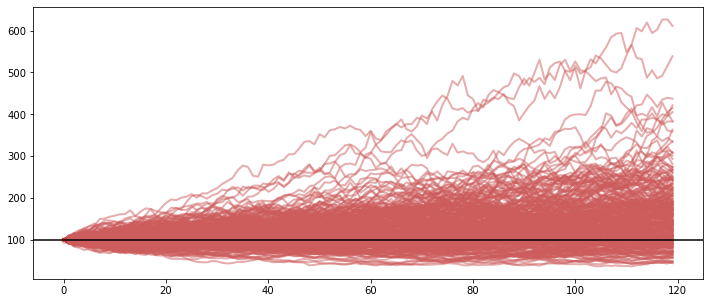

In [6]:
show_gbm(300,0.05,.15)

In [7]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=(1,20,2),
                                   mu=(-.3,0.3,0.01),
                                   sigma=(0,0.3,0.01))

In [8]:
display(gbm_controls)

interactive(children=(IntSlider(value=9, description='n_scenarios', max=20, min=1, step=2), FloatSlider(value=…

### interactive CPPI simulation - Monte Carlo

In [30]:
def show_cppi (n_scenarios = 50, mu = 0.07, sigma = 0.15, m= 3, floor = 0., risk_free = 0.3, y_max = 100):
    
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    
    start = 100
    sim_rets = erk.gbm(n_scenarios= n_scenarios, mu = mu, sigma= sigma, prices = False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the back test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate = risk_free, m= m, start = start, floor = floor)
    wealth = btr['Wealth']
    y_max = wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha = 0.3, color = 'indianred', figsize = (12,6))
    ax.axhline(y=start, ls=':', color = 'b')
    ax.axhline(y = start*floor, ls = '--', color = 'r')
    ax.set_ylim(top=y_max)  
    

In [32]:
cppi_controls= widgets.interactive(show_cppi,
                                   n_scenarios = widgets.IntSlider(min = 1, max = 100, step = 5, value = 50), 
                                   mu = (0.,+.2,0.01), 
                                   sigma = (0,.3,.05),
                                   floor = (0,2,.1),
                                   m=(1,5,.5),
                                   riskfree_rate = (0,0.05,.01),
                                   y_max = widgets.IntSlider(min = 0, max = 100, step = 1, value = 100, description = "Zoom Y Axis")
                                  )
                                


In [33]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', min=1, step=5), FloatSlider(value=0.07, d…

### Histogram and Violations

In [82]:
def show_cppi (n_scenarios = 50, mu = 0.07, sigma = 0.15, m= 3, floor = 0., risk_free = 0.3, y_max = 100):
    
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    
    start = 100
    sim_rets = erk.gbm(n_scenarios= n_scenarios, mu = mu, sigma= sigma, prices = False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the back test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate = risk_free, m= m, start = start, floor = floor)
    wealth = btr['Wealth']
    #Calculate terminal Wealth Stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()    
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures >0 else 0.0
    
    #plot
    fig, (wealth_ax, hist_ax)  = plt.subplots(nrows=1, ncols = 2, sharey = True, gridspec_kw = {'width_ratios': [3,2]}, figsize = (24,9))
    plt.subplots_adjust(wspace = 0.0)
    
    wealth.plot(ax = wealth_ax, legend = False, alpha = 0.3, color = 'indianred')
    wealth_ax.axhline(y=start, ls=':', color = 'b')
    wealth_ax.axhline(y = start*floor, ls = '--', color = 'r')
    wealth_ax.set_ylim(top=y_max)  
    
    
    terminal_wealth.plot.hist(ax = hist_ax, bins = 50, ec = 'w', fc = 'indianred', orientation = 'horizontal')
    hist_ax.axhline(y=start, ls=':', color = 'black')
    hist_ax.axhline(y=tw_mean, ls=':', color = 'blue')
    hist_ax.axhline(y=tw_median, ls=':', color = 'purple')
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(0.7,0.9), xycoords = 'axes fraction', fontsize = 24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(0.7,0.85), xycoords = 'axes fraction', fontsize = 24)
    
    if (floor > 0.01):
        hist_ax.axhline(y = start*floor, ls="--", color = "red", linewidth = 3)
        hist_ax.annotate(f"Violations: ${n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(0.7,0.7), xycoords = 'axes fraction', fontsize = 24)
    
    

In [86]:
cppi_controls= widgets.interactive(show_cppi,
                                   n_scenarios = widgets.IntSlider(min = 1, max = 100, step = 5, value = 50), 
                                   mu = (-0.2,+.2,0.01), 
                                   sigma = (0,.3,.05),
                                   floor = (0,2,.1),
                                   m=(1,5,.5),
                                   riskfree_rate = (0,0.05,.01),
                                   y_max = widgets.IntSlider(min = 0, max = 100, step = 1, value = 100, description = "Zoom Y Axis")
                                  )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', min=1, step=5), FloatSlider(value=0.07, d…